In [1]:
import osmnx as ox
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import math
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [2]:
grouped_dataframes = pd.read_pickle('grouped_dataframes.pkl')

for key, df in grouped_dataframes.items():
    df['traffic_flow'] = df['traffic_flow'].apply(lambda x: x * 10**3 if not pd.isna(x) and x != int(x) else x)

In [3]:

def adjust_traffic_flow(df, column_name, multiplier=2):
    """
    Adjusts the traffic flow value of 1.0 in a DataFrame to 1000 if it is between
    two values that are significantly higher (default: multiple of 2).

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the traffic flow column.
        multiplier (float): The factor that determines "significantly higher".

    Returns:
        pd.DataFrame: Modified DataFrame with adjusted traffic flow values.
    """
    traffic_flow = df[column_name].values
    for i in range(1, len(traffic_flow) - 1):
        # Check if the current value is 1.0 and it's between two values that are higher
        if (traffic_flow[i] == 1.0 and 
            traffic_flow[i - 1] > multiplier and 
            traffic_flow[i + 1] > multiplier):
            traffic_flow[i] = 1000
    
    # Update the DataFrame column
    df[column_name] = traffic_flow
    return df

grouped_dataframes = {key: adjust_traffic_flow(df, 'traffic_flow') for key, df in grouped_dataframes.items()}

In [4]:
# filter grouped_dataframes to only include dataframes which name has a "+" "-" or "T" at the end of the name 
names = list(grouped_dataframes.keys())
filtered_dataframes = {}
for name in names:
    single_name = name[0]
    if single_name[-1] in ["T"]:
        filtered_dataframes[name] = grouped_dataframes[name]
        
len(filtered_dataframes)

137

In [ ]:
unique_dataframes = dict()
grouped_dataframes = filtered_dataframes
cords = list()
names = (grouped_dataframes.keys()) 
k = 0

for name in names:
    x,y = grouped_dataframes[name]['Xkoordinat'].iloc[0], grouped_dataframes[name]['Xkoordinat'].iloc[0]
    if (x,y) not in cords:
        unique_dataframes[name] = grouped_dataframes[name]
        print("Unique Dataframes", k)
        k += 1
        cords.append((x,y))

grouped_dataframes = unique_dataframes
        

Unique Dataframes 0
Unique Dataframes 1
Unique Dataframes 2
Unique Dataframes 3
Unique Dataframes 4
Unique Dataframes 5
Unique Dataframes 6
Unique Dataframes 7
Unique Dataframes 8
Unique Dataframes 9
Unique Dataframes 10
Unique Dataframes 11
Unique Dataframes 12
Unique Dataframes 13
Unique Dataframes 14
Unique Dataframes 15
Unique Dataframes 16
Unique Dataframes 17
Unique Dataframes 18
Unique Dataframes 19
Unique Dataframes 20
Unique Dataframes 21
Unique Dataframes 22
Unique Dataframes 23
Unique Dataframes 24
Unique Dataframes 25
Unique Dataframes 26
Unique Dataframes 27
Unique Dataframes 28
Unique Dataframes 29
Unique Dataframes 30
Unique Dataframes 31
Unique Dataframes 32
Unique Dataframes 33
Unique Dataframes 34
Unique Dataframes 35
Unique Dataframes 36
Unique Dataframes 37
Unique Dataframes 38
Unique Dataframes 39
Unique Dataframes 40
Unique Dataframes 41
Unique Dataframes 42
Unique Dataframes 43
Unique Dataframes 44
Unique Dataframes 45
Unique Dataframes 46
Unique Dataframes 47
Un

In [6]:
import math

def find_closest_unconnected_nodes(grouped_dataframes):
    closest = dict()
    cleaned_dataframes = {}
    names = list(grouped_dataframes.keys())
    for i, name in enumerate(names):
        print(f"{i}/{len(names)}")
        df = grouped_dataframes[name]
        cleaned_dataframes[i] = df[['traffic_flow', 'Xkoordinat', 'Ykoordinat']].copy()
        x1 = df['Xkoordinat'].iloc[0]# + np.random-randint(-3000,3000)
        y1 = df['Ykoordinat'].iloc[0]# + np.random-randint(-3000,3000)
        
        for j, other_name in enumerate(names):
            if j != i:
                df2 = grouped_dataframes[other_name]
                x2, y2 = df2['Xkoordinat'].iloc[0], df2['Ykoordinat'].iloc[0]
                closest[j] = euclidean_distance(x1, y1, x2, y2)
        
        for k in range(0,30,1):
            cleaned_dataframes[i][f'closest_edge_{k}'] = None
            smallest_edge = min(closest, key=closest.get)
            cleaned_dataframes[i][f'closest_edge_{k}'] = smallest_edge
            closest.pop(smallest_edge)

    
    return cleaned_dataframes

cleaned_dataframes = find_closest_unconnected_nodes(grouped_dataframes)

0/136
1/136
2/136
3/136
4/136
5/136
6/136
7/136
8/136
9/136
10/136
11/136
12/136
13/136
14/136
15/136
16/136
17/136
18/136
19/136
20/136
21/136
22/136
23/136
24/136
25/136
26/136
27/136
28/136
29/136
30/136
31/136
32/136
33/136
34/136
35/136
36/136
37/136
38/136
39/136
40/136
41/136
42/136
43/136
44/136
45/136
46/136
47/136
48/136
49/136
50/136
51/136
52/136
53/136
54/136
55/136
56/136
57/136
58/136
59/136
60/136
61/136
62/136
63/136
64/136
65/136
66/136
67/136
68/136
69/136
70/136
71/136
72/136
73/136
74/136
75/136
76/136
77/136
78/136
79/136
80/136
81/136
82/136
83/136
84/136
85/136
86/136
87/136
88/136
89/136
90/136
91/136
92/136
93/136
94/136
95/136
96/136
97/136
98/136
99/136
100/136
101/136
102/136
103/136
104/136
105/136
106/136
107/136
108/136
109/136
110/136
111/136
112/136
113/136
114/136
115/136
116/136
117/136
118/136
119/136
120/136
121/136
122/136
123/136
124/136
125/136
126/136
127/136
128/136
129/136
130/136
131/136
132/136
133/136
134/136
135/136


In [7]:
# from datetime import datetime
# import time
# def find_longest_common_period(dataframes_dict):
#     """
#     This function finds the longest common date range across a dictionary of dataframes, 
#     where each dataframe's index is a datetime object representing the time series.
    
#     Parameters:
#     dataframes_dict (dict): A dictionary of DataFrames where each DataFrame has a datetime index.

#     Returns:
#     tuple: Start and end date of the longest common period.
#     """
#     # Initialize the start and end dates to the extreme opposites
#     max_start_date = timestamp = time.mktime(time.strptime('1970-10-20 22:24:46', '%Y-%m-%d %H:%M:%S'))
#     min_end_date = timestamp = time.mktime(time.strptime('2025-10-20 22:24:46', '%Y-%m-%d %H:%M:%S'))

#     # Loop through each DataFrame to find the latest start date and earliest end date
#     for df in dataframes_dict.values():
#         # Get the start and end dates of each DataFrame
#         df_start_date = df.index.min()
#         df_end_date = df.index.max()

#         # Update the max of start dates and min of end dates
#         max_start_date = max(max_start_date, df_start_date)
#         min_end_date = min(min_end_date, df_end_date)
#         print(max_start_date, min_end_date)
#     # Check if there's a valid common period
#     if max_start_date <= min_end_date:
#         return max_start_date, min_end_date
#     else:
#         return None  # No overlapping period found

# find_longest_common_period(cleaned_dataframes)

In [8]:
def create_15min_interval_index(start_date, end_date):
    # Convert start_date and end_date to milliseconds
    current_time = int(start_date.timestamp())
    end_time = int(end_date.timestamp())
    
    # Interval in milliseconds (15 minutes = 900000 ms)
    interval = 900

    # List to hold each timestamp in milliseconds
    time_index_ms = []

    # Loop to generate timestamps at 15-minute intervals
    while current_time <= end_time:
        time_index_ms.append(current_time)
        current_time += interval

    return pd.Index(time_index_ms)

# Determine the earliest start date and latest end date across all DataFrames
start_date = min(df.index.min() for df in cleaned_dataframes.values() if df.index.notna().all())
end_date = max(df.index.max() for df in cleaned_dataframes.values() if df.index.notna().all())

start_date = pd.Timestamp("2022-01-01 00:00:00")
end_date = pd.Timestamp("2024-01-01 00:00:00")

time_index_ms = create_15min_interval_index(start_date, end_date)

everything_df = pd.DataFrame(index=time_index_ms, columns=range(0,65,1))

In [9]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [10]:
# Collect data without inserting directly into everything_df
for i, name in enumerate(cleaned_dataframes):
    print("DataFrames: ", i, "Total: ", len(cleaned_dataframes))
    df = cleaned_dataframes[name]['traffic_flow']

    for j, traffic_flow in enumerate(df):
        idx = df.index[j]
        #print("DF: ",name,idx)
        everything_df.loc[idx, name] = traffic_flow

        if j%10000==0:
            print(j, len(df))

DataFrames:  0 Total:  136
0 34656
10000 34656
20000 34656
30000 34656
DataFrames:  1 Total:  136
0 61344
10000 61344
20000 61344
30000 61344
40000 61344
50000 61344
60000 61344
DataFrames:  2 Total:  136
0 53664
10000 53664
20000 53664
30000 53664
40000 53664
50000 53664
DataFrames:  3 Total:  136
0 53760
10000 53760
20000 53760
30000 53760
40000 53760
50000 53760
DataFrames:  4 Total:  136
0 31488
10000 31488
20000 31488
30000 31488
DataFrames:  5 Total:  136
0 61152
10000 61152
20000 61152
30000 61152
40000 61152
50000 61152
60000 61152
DataFrames:  6 Total:  136
0 61152
10000 61152
20000 61152
30000 61152
40000 61152
50000 61152
60000 61152
DataFrames:  7 Total:  136
0 29760
10000 29760
20000 29760
DataFrames:  8 Total:  136
0 55776
10000 55776
20000 55776
30000 55776
40000 55776
50000 55776
DataFrames:  9 Total:  136
0 60000
10000 60000
20000 60000
30000 60000
40000 60000
50000 60000
DataFrames:  10 Total:  136
0 39648
10000 39648
20000 39648
30000 39648
DataFrames:  11 Total:  13

In [11]:
pd.set_option('display.max_rows', None)
everything_df.notna().sum()


0      33529
1      56629
2      48804
3      49039
4      30367
5      56443
6      56443
7      28587
8      50944
9      55088
10     38292
11     54543
12     47336
13     54990
14     56224
15     56224
16     41420
17     33810
18     53277
19     56327
20     33810
21     56073
22     56105
23     43426
24     43426
25     55043
26     49021
27     56629
28     29045
29     54937
30     54937
31     46286
32     55924
33     54937
34     49353
35     56536
36     54012
37     56629
38     56099
39     49353
40     56536
41     38056
42     56629
43     56191
44     49256
45     56629
46     51640
47     50387
48     47355
49     22680
50     22680
51     22688
52     55293
53     22688
54     22688
55     55294
56     33941
57     56629
58     56629
59     46452
60     56248
61     54271
62     54360
63     56216
64     54267
65     54457
66     47984
67     47976
68     47984
69     55243
70     55243
71     54908
72     49945
73     49961
74     49961
75     56540
76     53786

In [12]:
# total_dataframes = len(cleaned_dataframes)
# for i, name in enumerate(cleaned_dataframes):
#     print(f"Processing {i+1}/{total_dataframes}: {name}")
#     df = cleaned_dataframes[name]['traffic_flow']

#     # Remove duplicates
#     df_no_duplicates = df.groupby(df.index).last()

#     # Align indices
#     common_indices = df_no_duplicates.index.intersection(everything_df.index)
#     df_filtered = df_no_duplicates.loc[common_indices]

#     # Assign values
#     everything_df.loc[common_indices, name] = df_filtered.values

#     # Optional: Progress update
#     if (i + 1) % 10 == 0 or (i + 1) == total_dataframes:
#         print(f"Completed {i + 1}/{total_dataframes} dataframes.")

# print("Data updating complete.")


In [13]:
pd.set_option('display.max_rows', 500)
print(everything_df.notna().sum())

0      33529
1      56629
2      48804
3      49039
4      30367
5      56443
6      56443
7      28587
8      50944
9      55088
10     38292
11     54543
12     47336
13     54990
14     56224
15     56224
16     41420
17     33810
18     53277
19     56327
20     33810
21     56073
22     56105
23     43426
24     43426
25     55043
26     49021
27     56629
28     29045
29     54937
30     54937
31     46286
32     55924
33     54937
34     49353
35     56536
36     54012
37     56629
38     56099
39     49353
40     56536
41     38056
42     56629
43     56191
44     49256
45     56629
46     51640
47     50387
48     47355
49     22680
50     22680
51     22688
52     55293
53     22688
54     22688
55     55294
56     33941
57     56629
58     56629
59     46452
60     56248
61     54271
62     54360
63     56216
64     54267
65     54457
66     47984
67     47976
68     47984
69     55243
70     55243
71     54908
72     49945
73     49961
74     49961
75     56540
76     53786

In [14]:
def find_longest_non_nan_period(df, threshold=None, tolerance=0, axis=0):
    """
    Finds the longest continuous period in a DataFrame where there are no NaN values in most rows or columns,
    with tolerance for short gaps.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    threshold (float): The minimum proportion of non-NaN values in each row or column (e.g., 0.8 for 80%).
                       If None, defaults to 50% (more than half of the elements in the row/column).
    tolerance (int): The maximum number of consecutive invalid rows or columns that are tolerated as part of the period.
    axis (int): The axis to analyze. 0 for rows (default), 1 for columns.

    Returns:
    pd.DataFrame: Cropped DataFrame to the longest continuous period with minimal NaN values.
    """
    # Set default threshold to more than half of the elements if not specified
    if threshold is None:
        threshold = 0.5

    # Calculate the required number of non-NaN values per row or column
    required_non_nan = int(len(df.columns if axis == 0 else df.index) * threshold)

    # Create a boolean mask where each row or column has True if it meets the non-NaN requirement
    valid = (df.notna().sum(axis=1-axis) >= required_non_nan)

    # Variables to track the longest valid period
    max_start = max_end = temp_start = temp_length = max_length = 0
    gap_count = 0  # Count of consecutive invalid rows or columns within tolerance

    for i, is_valid in enumerate(valid):
        if is_valid:
            if temp_length == 0:
                temp_start = i  # Start a new period
            temp_length += 1
            gap_count = 0  # Reset gap count as we are in a valid row/column
        else:
            if gap_count < tolerance:
                gap_count += 1  # Increase gap count but keep period going
                temp_length += 1
            else:
                # End of current period due to excessive gap
                if temp_length > max_length:
                    max_start, max_end = temp_start, temp_start + temp_length
                    max_length = temp_length
                # Reset for a new period
                temp_length = 0
                gap_count = 0

    # Final check in case the longest period ends at the last row/column
    if temp_length > max_length:
        max_start, max_end = temp_start, temp_start + temp_length

    # Crop the DataFrame to the longest continuous non-NaN period
    if axis == 0:  # Rows
        return df.iloc[max_start:max_end]
    else:  # Columns
        return df.iloc[:, max_start:max_end]

# Analyze rows (axis=0, default) or columns (axis=1)
better = find_longest_non_nan_period(everything_df, threshold=0.90, tolerance=4, axis=0)

In [15]:
better.dropna(axis=0, how='all', inplace=True)
better = better.bfill(inplace=False)
#better.fillna(0, inplace=True)

C:\Users\gonde\AppData\Local\Temp\ipykernel_7976\1341583080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  better.dropna(axis=0, how='all', inplace=True)
C:\Users\gonde\AppData\Local\Temp\ipykernel_7976\1341583080.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  better = better.bfill(inplace=False)


In [16]:
pd.set_option('display.max_rows', 200)
print(better.isna().sum())

# drop all coloumns that have over 2000 nan values
better = better.dropna(axis=1, thresh=2000)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49     5700
50     5700
51     5700
52        0
53     5700
54     5700
55        0
56        0
57        0
58        0
59        0
60        0
61        0
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69        4
70        4
71        4
72       24
73       24
74       24
75        0
76        0
77        0
78       24
79        0
80        0
81        0
82        0
83  

In [17]:
def find_columns_with_repeating_values(df, threshold):
    """
    Checks each column in the DataFrame for repeating value sequences longer than the specified threshold.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    threshold (int): The minimum length of the repeating value sequence to consider.

    Returns:
    list: A list of column names that have repeating value sequences longer than the threshold.
    """
    columns_with_repeating_values = []

    for column in df.columns:
        longest_count = 0
        current_value = None
        current_count = 0

        # Loop through the values in the column
        for value in df[column]:
            if value == current_value:
                current_count += 1
            else:
                if current_count > longest_count:
                    longest_count = current_count
                current_value = value
                current_count = 1

        # Final check in case the longest sequence ends at the last row
        if current_count > longest_count:
            longest_count = current_count

        # Check if the longest repeating sequence is longer than the threshold
        if longest_count > threshold:
            columns_with_repeating_values.append(column)

    return columns_with_repeating_values
    
def filter_dict_and_dataframe_by_keys(data_dict, df):
    """
    Filters a dictionary and a DataFrame to only keep dictionary entries 
    where the keys match the column names of the DataFrame, and vice versa.

    Parameters:
    data_dict (dict): The dictionary to filter.
    df (pd.DataFrame): The DataFrame to filter.

    Returns:
    tuple: (filtered_dict, filtered_df)
    """
    # Find common keys between the dictionary and DataFrame columns
    common_keys = set(data_dict.keys()).intersection(set(df.columns))
    
    # Filter the dictionary to only keep entries with matching keys
    filtered_dict = {key: value for key, value in data_dict.items() if key in common_keys}
    
    # Filter the DataFrame to only keep columns with matching keys (convert set to list)
    filtered_df = df.loc[:, list(common_keys)]

    return filtered_dict, filtered_df

# Example Usage
threshold = 30

# Step 1: Identify columns to remove based on repeating values
remove_columns = find_columns_with_repeating_values(better, threshold)

# Step 2: Drop those columns from the DataFrame
better = better.drop(columns=remove_columns)

# Debug print
print(f"Columns removed: {remove_columns}")
cleaned_dataframes = find_closest_unconnected_nodes(cleaned_dataframes)
# Step 3: Filter dictionary and DataFrame to keep only common keys
cleaned_dataframes, better = filter_dict_and_dataframe_by_keys(cleaned_dataframes, better)

# Debug print to verify the final filtered DataFrame
print(f"Remaining columns in DataFrame: {better.columns}")
print(f"Remaining keys in dictionary: {list(cleaned_dataframes.keys())}")

Columns removed: [14, 15, 16, 18, 72, 73, 74, 78, 83, 87, 91, 132]
0/136
1/136
2/136
3/136
4/136
5/136
6/136
7/136
8/136
9/136
10/136
11/136
12/136
13/136
14/136
15/136
16/136
17/136
18/136
19/136
20/136
21/136
22/136
23/136
24/136
25/136
26/136
27/136
28/136
29/136
30/136
31/136
32/136
33/136
34/136
35/136
36/136
37/136
38/136
39/136
40/136
41/136
42/136
43/136
44/136
45/136
46/136
47/136
48/136
49/136
50/136
51/136
52/136
53/136
54/136
55/136
56/136
57/136
58/136
59/136
60/136
61/136
62/136
63/136
64/136
65/136
66/136
67/136
68/136
69/136
70/136
71/136
72/136
73/136
74/136
75/136
76/136
77/136
78/136
79/136
80/136
81/136
82/136
83/136
84/136
85/136
86/136
87/136
88/136
89/136
90/136
91/136
92/136
93/136
94/136
95/136
96/136
97/136
98/136
99/136
100/136
101/136
102/136
103/136
104/136
105/136
106/136
107/136
108/136
109/136
110/136
111/136
112/136
113/136
114/136
115/136
116/136
117/136
118/136
119/136
120/136
121/136
122/136
123/136
124/136
125/136
126/136
127/136
128/136
129/136
130

Text(0.5, 1.0, 'Traffic Flow for 15 minutes intervals')

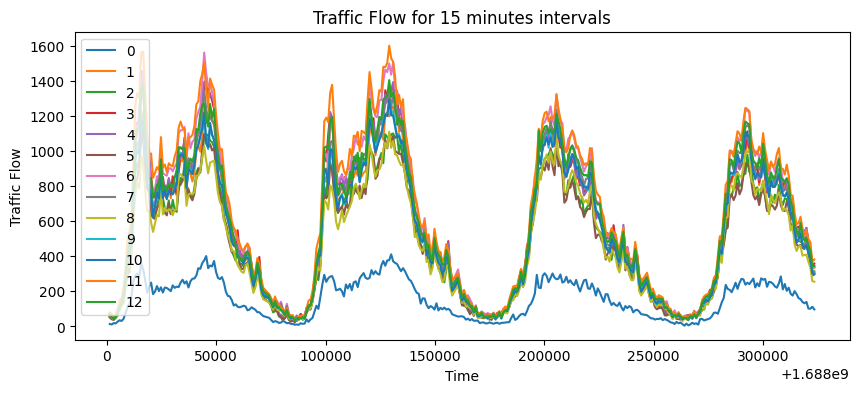

In [113]:
# plot values in everything_df
plt.figure(figsize=(10, 4))
plt.plot(better[[1,2,3,4,5,6,7,8,9,10,11,12,13]][850:1200])
plt.legend(better.columns)
plt.ylabel('Traffic Flow')
plt.xlabel('Time')
plt.title('Traffic Flow for 15 minutes intervals')

Graph

In [19]:
print(list(cleaned_dataframes.keys()) == list(better.columns), len(better.columns))

True 118


In [30]:
# Initialize the graph
graph = nx.Graph()

names = list(cleaned_dataframes.keys())

# Add nodes and edges to the graph
for k,i in enumerate(names):
    print("K: ",k, "I: ",i)
    idx = cleaned_dataframes[i].first_valid_index()
    
    # Add node with attributes
    graph.add_node(
        k,
        x=cleaned_dataframes[i]['Xkoordinat'][idx],
        y=cleaned_dataframes[i]['Ykoordinat'][idx],
        traffic=better[i].values
    )
    print(cleaned_dataframes[i]['Xkoordinat'][idx], cleaned_dataframes[i]['Ykoordinat'][idx])
    for l in range(0,2,1):
        # Get the ID of the closest edge and add an edge between nodes
        closest_node = cleaned_dataframes[i][f'closest_edge_{l}'].iloc[0]

        if closest_node not in list(cleaned_dataframes.keys()) and k not in list(cleaned_dataframes.keys()):
            print("FUCK")
            break

        print("Connecting Nodes: ", k, "To: ", closest_node)
        graph.add_edge(k, closest_node)  # Add edge by node indices (i, closest_node)
        #graph.add_edge(i, np.random.randint(484))  # Add edge by node indices (i, closest_node)


K:  0 I:  0
552601.0 6329842.0
Connecting Nodes:  0 To:  1
Connecting Nodes:  0 To:  100
K:  1 I:  1
549360.0 6330576.0
Connecting Nodes:  1 To:  0
Connecting Nodes:  1 To:  100
K:  2 I:  2
552269.0 6311346.0
Connecting Nodes:  2 To:  44
Connecting Nodes:  2 To:  26
K:  3 I:  3
552730.0 6312348.0
Connecting Nodes:  3 To:  34
Connecting Nodes:  3 To:  39
K:  4 I:  4
553084.0 6313171.0
Connecting Nodes:  4 To:  39
Connecting Nodes:  4 To:  34
K:  5 I:  5
555132.0 6317792.0
Connecting Nodes:  5 To:  27
Connecting Nodes:  5 To:  6
K:  6 I:  6
555308.0 6318304.0
Connecting Nodes:  6 To:  40
Connecting Nodes:  6 To:  45
K:  7 I:  7
555789.0 6318873.0
Connecting Nodes:  7 To:  28
Connecting Nodes:  7 To:  46
K:  8 I:  8
556145.0 6319061.0
Connecting Nodes:  8 To:  46
Connecting Nodes:  8 To:  28
K:  9 I:  9
558245.0 6319907.0
Connecting Nodes:  9 To:  29
Connecting Nodes:  9 To:  30
K:  10 I:  10
558753.0 6320685.0
Connecting Nodes:  10 To:  11
Connecting Nodes:  10 To:  36
K:  11 I:  11
5590

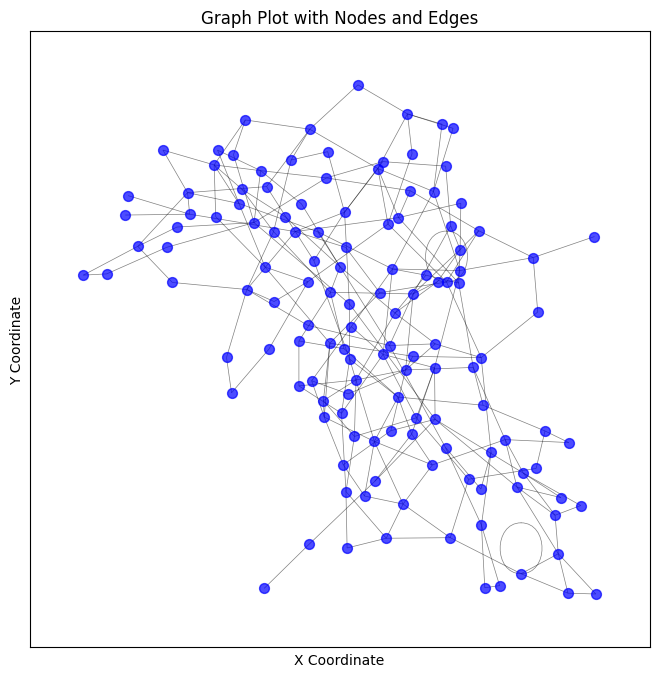

In [31]:
# Spring layout
#pos = {node: (data['x'], data['y']) for node, data in graph.nodes(data=True)}
pos = nx.spring_layout(graph)

# Plot the graph
plt.figure(figsize=(8, 8))

# Draw nodes with custom size
nx.draw_networkx_nodes(graph, pos, node_size=50, node_color="blue", alpha=0.7)

# Draw edges with custom width
nx.draw_networkx_edges(graph, pos, width=0.5, edge_color="black", alpha=0.5)

# Optionally, draw labels for each node if you want to see the node IDs or specific data
# Uncomment the following line if you'd like to see labels (e.g., traffic values or node IDs)
# nx.draw_networkx_labels(graph, pos, labels={node: node for node in graph.nodes()}, font_size=8)

# Set plot labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Graph Plot with Nodes and Edges")

# Show the plot
plt.show()

In [32]:
def clean_graph(graph):
    # Remove self-loops
    graph = graph.copy()  # Avoid modifying the
    self_loops = list(nx.selfloop_edges(graph))
    graph.remove_edges_from(self_loops)
    
    # Remove duplicate edges (not necessary for undirected graphs in NetworkX)
    # Here just in case your graph is directed or you need further verification
    edges_to_remove = []
    for u, v, data in graph.edges(data=True):
        if graph.number_of_edges(u, v) > 1:  # More than one edge exists
            edges_to_remove.append((u, v))
    
    graph.remove_edges_from(edges_to_remove)
    
    print(f"Removed {len(self_loops)} self-loops and {len(edges_to_remove)} duplicate edges.")
    return graph

graph = clean_graph(graph)

Removed 2 self-loops and 0 duplicate edges.


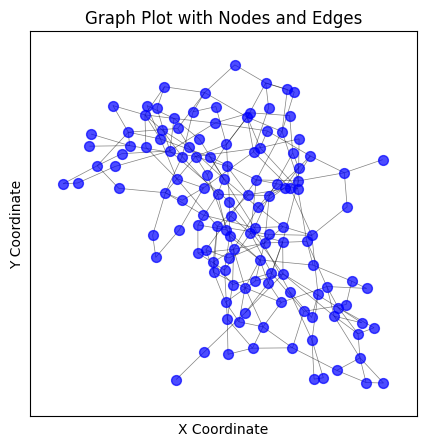

In [33]:
# extract largest component
largest_component = max(nx.connected_components(graph), key=len)
graph = graph.subgraph(largest_component)
# Plot the graph
plt.figure(figsize=(5, 5))

# Draw nodes with custom size
nx.draw_networkx_nodes(graph, pos, node_size=50, node_color="blue", alpha=0.7)

# Draw edges with custom width
nx.draw_networkx_edges(graph, pos, width=0.5, edge_color="black", alpha=0.5)

# Optionally, draw labels for each node if you want to see the node IDs or specific data
# Uncomment the following line if you'd like to see labels (e.g., traffic values or node IDs)
# nx.draw_networkx_labels(graph, pos, labels={node: node for node in graph.nodes()}, font_size=8)

# Set plot labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Graph Plot with Nodes and Edges")

# Show the plot
plt.show()

In [25]:
import pickle

pickle.dump(graph, open('graph.pkl', 'wb'))

Model things

In [34]:
# Initialize the graph
graph = nx.Graph()

# Map names to indices
name_to_index = {name: idx for idx, name in enumerate(cleaned_dataframes.keys())}
remove_later = list()
# Add nodes to the graph
for name, idx in name_to_index.items():
    first_valid_idx = cleaned_dataframes[name].first_valid_index()
    if first_valid_idx is None:
        print(f"Skipping node {name} due to no valid data.")
        continue
    # check if better has nan values in the column and skip if it does
    if better[name].isna().sum() > 0:
        print(f"Skipping node {name} due to NaN values in traffic flow.")
        #remove from name_to_index
        remove_later.append(name)
        continue
    # Add node with attributes
    graph.add_node(
        idx,
        x=cleaned_dataframes[name]['Xkoordinat'][first_valid_idx],
        y=cleaned_dataframes[name]['Ykoordinat'][first_valid_idx],
        traffic=better[name].values
    )

name_to_index = {name: idx for name, idx in name_to_index.items() if name not in remove_later}

# Add edges to the graph
for name, idx in name_to_index.items():
    for l in range(4):  # Loop through up to 4 closest edges
        try:
            closest_node_name = cleaned_dataframes[name][f'closest_edge_{l}'].iloc[0]
            if closest_node_name in name_to_index:
                closest_node_idx = name_to_index[closest_node_name]
                graph.add_edge(idx, closest_node_idx)  # Add edge by indices
            else:
                print(f"Invalid closest node {closest_node_name} for {name}")
        except (KeyError, IndexError) as e:
            print(f"Error processing edge for {name}, closest_edge_{l}: {e}")
            continue

# Optional: Remove self-loops and duplicates
graph = nx.Graph(graph)  # Recreate graph to ensure edge uniqueness
graph.remove_edges_from(nx.selfloop_edges(graph))


Skipping node 69 due to NaN values in traffic flow.
Skipping node 70 due to NaN values in traffic flow.
Skipping node 71 due to NaN values in traffic flow.
Invalid closest node 14 for 13
Invalid closest node 16 for 17
Invalid closest node 18 for 17
Invalid closest node 18 for 19
Invalid closest node 18 for 20
Invalid closest node 15 for 25
Invalid closest node 50 for 25
Invalid closest node 51 for 25
Invalid closest node 14 for 31
Invalid closest node 14 for 37
Invalid closest node 14 for 42
Invalid closest node 51 for 52
Invalid closest node 50 for 52
Invalid closest node 53 for 52
Invalid closest node 54 for 55
Invalid closest node 49 for 55
Invalid closest node 53 for 55
Invalid closest node 50 for 55
Invalid closest node 70 for 77
Invalid closest node 74 for 79
Invalid closest node 87 for 79
Invalid closest node 83 for 79
Invalid closest node 73 for 79
Invalid closest node 70 for 82
Invalid closest node 70 for 86
Invalid closest node 70 for 90
Invalid closest node 132 for 130
Inval

In [27]:
# graph = nx.Graph(graph)

# # find all empty nodes and delete them
# empty_nodes = [node for node in graph.nodes if not graph.nodes[node]]
# graph.remove_nodes_from(empty_nodes)

# # find all nodes with no edges and delete them
# isolated_nodes = list(nx.isolates(graph))
# graph.remove_nodes_from(isolated_nodes)

# # find all edges with no valid no indices and delete them
# edges = list(graph.edges())
# for edge in edges:
#     if edge[0] not in graph.nodes or edge[1] not in graph.nodes:
#         print("Remove")
#         graph.remove_edge(edge[0], edge[1])

In [35]:
for data in graph.nodes(data=True):
    print(data)

(0, {'x': 552601.0, 'y': 6329842.0, 'traffic': array([28., 27., 22., ..., 16., 15., 26.])})
(1, {'x': 549360.0, 'y': 6330576.0, 'traffic': array([24., 18., 18., ..., 15., 14., 16.])})
(2, {'x': 552269.0, 'y': 6311346.0, 'traffic': array([97., 50., 60., ..., 55., 74., 45.])})
(3, {'x': 552730.0, 'y': 6312348.0, 'traffic': array([89., 41., 57., ..., 49., 67., 40.])})
(4, {'x': 553084.0, 'y': 6313171.0, 'traffic': array([102.,  47.,  67., ...,  56.,  76.,  51.])})
(5, {'x': 555132.0, 'y': 6317792.0, 'traffic': array([86., 79., 47., ..., 62., 72., 53.])})
(6, {'x': 555308.0, 'y': 6318304.0, 'traffic': array([75., 66., 41., ..., 59., 61., 46.])})
(7, {'x': 555789.0, 'y': 6318873.0, 'traffic': array([82., 88., 43., ..., 73., 67., 56.])})
(8, {'x': 556145.0, 'y': 6319061.0, 'traffic': array([77., 82., 40., ..., 70., 63., 51.])})
(9, {'x': 558245.0, 'y': 6319907.0, 'traffic': array([63., 72., 33., ..., 60., 57., 48.])})
(10, {'x': 558753.0, 'y': 6320685.0, 'traffic': array([72., 77., 41., ...,

In [58]:
valid_nodes = set(range(data.x.size(0)))
graph = graph.subgraph(valid_nodes).copy()  # Restrict to valid nodes

graph.remove_edges_from(
    [(u, v) for u, v in graph.edges if u not in valid_nodes or v not in valid_nodes]
)

In [99]:
import torch
import numpy as np
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.optim import Adam


In [100]:

# Assuming `graph` is your NetworkX graph
x_coords = [data['x'] for _, data in graph.nodes(data=True)]
y_coords = [data['y'] for _, data in graph.nodes(data=True)]
traffic_series = [data['traffic'] for _, data in graph.nodes(data=True)]

# Convert the traffic data list to a 2D numpy array
traffic_series = np.stack(traffic_series)

# Sliding window parameters
lookback = 50  # Number of time steps to look back
pred_horizon = 1  # Predict the next time step

# Create sliding window input and output tensors
def create_sliding_window_data(traffic_series, lookback, pred_horizon):
    X, y = [], []
    for node_series in traffic_series:
        for i in range(len(node_series) - lookback - pred_horizon + 1):
            X.append(node_series[i:i + lookback])  # Input: Lookback window
            y.append(node_series[i + lookback:i + lookback + pred_horizon])  # Output: Next step(s)
    return np.array(X), np.array(y)

# Generate sliding window data
X, y = create_sliding_window_data(traffic_series, lookback, pred_horizon)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float)  # Shape: [num_samples, lookback]
y = torch.tensor(y, dtype=torch.float)  # Shape: [num_samples, pred_horizon]

# Prepare graph edges
edge_index = torch.tensor(
    [edge for edge in graph.edges if edge[0] < len(graph.nodes) and edge[1] < len(graph.nodes)]
).T

# Create PyTorch Geometric Data object
data = Data(x=X, edge_index=edge_index, y=y.view(-1, pred_horizon))  # Include target in data


In [102]:
import torch
import numpy as np
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.optim import Adam

# Define the GNN model
class TrafficGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.fc = torch.nn.Linear(hidden_channels, out_channels)  # Fully connected layer for predictions

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.fc(x)  # Predict the next time step(s)
        return x


In [ ]:
# Initialize the model
model = TrafficGNN(in_channels=lookback, hidden_channels=32, out_channels=pred_horizon)


In [110]:
# Optimizer and loss function
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = torch.nn.MSELoss()

# Training loop
model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    out = model(data)  # Output shape: [num_samples, pred_horizon]
    loss = criterion(out, data.y)  # Target shape: [num_samples, pred_horizon]
    loss.backward()
    optimizer.step()
    if epoch % 1 == 0:  # Print loss every 1000 epochs
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# # After training, save the model
# torch.save(model.state_dict(), "traffic_gnn_model.pth")


Epoch 0, Loss: 5536.73046875
Epoch 1, Loss: 5464.81787109375
Epoch 2, Loss: 5430.6298828125
Epoch 3, Loss: 5428.84423828125
Epoch 4, Loss: 5443.974609375
Epoch 5, Loss: 5456.7421875
Epoch 6, Loss: 5458.2294921875
Epoch 7, Loss: 5450.45947265625
Epoch 8, Loss: 5439.26220703125
Epoch 9, Loss: 5429.9150390625
Epoch 10, Loss: 5425.498046875
Epoch 11, Loss: 5426.380859375
Epoch 12, Loss: 5430.56201171875
Epoch 13, Loss: 5434.9775390625
Epoch 14, Loss: 5437.14599609375
Epoch 15, Loss: 5436.20458984375
Epoch 16, Loss: 5432.884765625
Epoch 17, Loss: 5428.80224609375
Epoch 18, Loss: 5425.6044921875
Epoch 19, Loss: 5424.29345703125


KeyboardInterrupt: 